In [1]:
import torch
from torch import empty , cat , arange
from torch.nn.functional import fold , unfold


torch.set_grad_enabled(False)

if __name__ == "__main__" :
    kernel_size = (2 , 2)
    x = torch.randn((1 , 3 , 32 , 32) )
    y = torch.randn((1 , 3 , 32 , 32) )
    a = torch.randn((1 ,) )

    out_channels = 4

    conv = torch.nn.Conv2d( in_channels = x.shape[1], out_channels = out_channels, kernel_size = kernel_size, bias = False )

    torch.testing.assert_allclose(a*conv(x) , conv(a*x))
    torch.testing.assert_allclose(conv(x + y) , conv(x) + conv(y))

In [2]:
class ReLU():
    def forward(x):
        return max(0,x)
    def backward(x):
        return x

0 22.911159535680525 [[0.        ]
 [4.47982444]
 [1.37250687]
 [3.26545862]]
22.911159535680525 [[0.        ]
 [6.95964889]
 [0.74501375]
 [6.53091724]]
22.911159535680525 [[ 0.15368991]
 [20.26117228]
 [ 0.98598533]
 [ 8.39311763]
 [ 0.        ]
 [ 2.36118507]
 [ 0.        ]
 [ 9.72710384]
 [ 1.25375695]
 [26.2976303 ]
 [ 0.09610849]
 [ 6.0524677 ]
 [ 9.60683664]
 [ 0.        ]
 [ 4.3578115 ]
 [16.65728166]
 [ 0.22008463]
 [30.48500084]
 [ 1.51224854]
 [ 1.29991433]
 [ 0.        ]
 [ 0.08865605]
 [ 0.        ]
 [ 7.20681283]
 [15.59825335]
 [ 0.03303839]
 [11.26781143]
 [ 2.1551471 ]
 [ 0.15365547]
 [ 0.        ]]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         2.06408472 0.14167171 1.20596854 0.         0.
  0.   

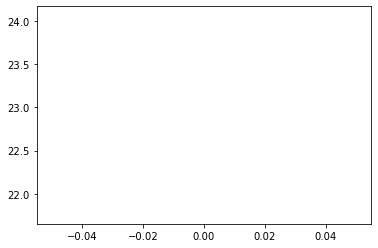

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

# N is batch size(sample size); D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 4, 2, 30, 1

# Create random input and output data
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 0.002
loss_col = []
for t in range(1):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)  # using ReLU as activate function
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum() # loss function
    loss_col.append(loss)
    print(t, loss, y_pred)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y) # the last layer's error
    print(loss, grad_y_pred)
    
    grad_w2 = h_relu.T.dot(grad_y_pred)
    print(loss, grad_w2)
    print(h_relu)
    grad_h_relu = grad_y_pred.dot(w2.T) # the second laye's error 
    print(loss, grad_h_relu)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0  # the derivate of ReLU
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

plt.plot(loss_col)
plt.show()


In [4]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(32,100),
    nn.ReLU(),
    nn.Linear(100, 32)
)


